In [1]:
!pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 692.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
# Import necessary libraries
import cirq
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
def select_gate_for_application(application):
    # Define the mapping from application to gates
    application_to_gate = {
        'coin flip': 'H',
        'bit flip': 'X',
        'phase flip': 'Z',
        'bitwise not': 'Y'
    }

    # Convert application to lowercase and select the appropriate gate
    gate_type = application_to_gate.get(application.lower(), 'H')  # Default to Hadamard gate if not found
    return gate_type

In [4]:
def create_circuit(gate_type):
    qubit = cirq.GridQubit(0, 0)
    circuit = cirq.Circuit()

    if gate_type == 'H':
        circuit.append(cirq.H(qubit))
    elif gate_type == 'X':
        circuit.append(cirq.X(qubit))
    elif gate_type == 'Y':
        circuit.append(cirq.Y(qubit))
    elif gate_type == 'Z':
        circuit.append(cirq.Z(qubit))
    else:
        print("Invalid gate type. Defaulting to Hadamard gate.")
        circuit.append(cirq.H(qubit))

    circuit.append(cirq.measure(qubit, key='result'))
    return circuit


In [5]:
def visualize_results(results):
    measurements = results.measurements['result'].flatten()
    counts = Counter(measurements)

    print("Measurement Results:", dict(counts))

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Measurement Result')
    plt.ylabel('Count')
    plt.title('Measurement Results Histogram')
    plt.xticks(ticks=[0, 1], labels=['0', '1'])
    plt.show()


In [6]:
def main():
    print("Ripples")

    # Get user input for the application
    application = input("Enter the application (e.g., 'coin flip', 'bit flip'): ")

    # Determine the appropriate gate for the given application
    gate_type = select_gate_for_application(application)
    print(f"Selected Gate for '{application}': {gate_type}")

    # Get user input for the number of repetitions
    try:
        repetitions = int(input("Enter the number of repetitions for the simulation: "))
    except ValueError:
        print("Invalid number. Defaulting to 1024 repetitions.")
        repetitions = 1024

    # Create and print the circuit
    circuit = create_circuit(gate_type)
    print("Quantum Circuit:")
    print(circuit)

    # Simulate the circuit
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=repetitions)

    # Visualize the results
    visualize_results(result)

Welcome to the Quantum Circuit Simulator!
Enter the application (e.g., 'coin flip', 'bit flip'): coin flip
Selected Gate for 'coin flip': H
Enter the number of repetitions for the simulation: 3
Quantum Circuit:
(0, 0): ───H───M('result')───
Measurement Results: {1: 2, 0: 1}


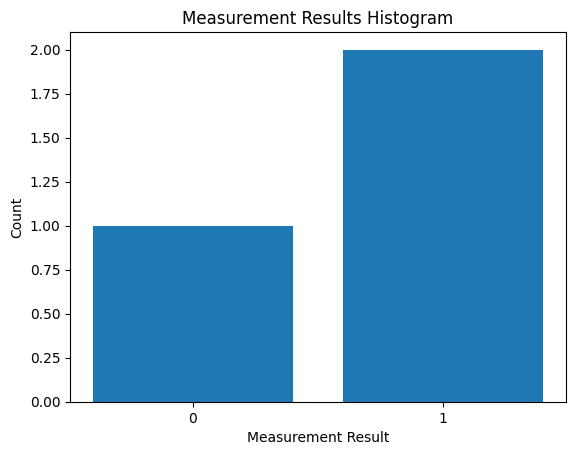

In [7]:
if __name__ == "__main__":
    main()
